In [17]:
using LinearAlgebra 
using SparseArrays 
using StructArrays
using StaticArrays
using StaticRanges

using IterativeSolvers
using Preconditioners

using BenchmarkTools
using Profile
#..using Profile

using Plots 

## Assignment 1

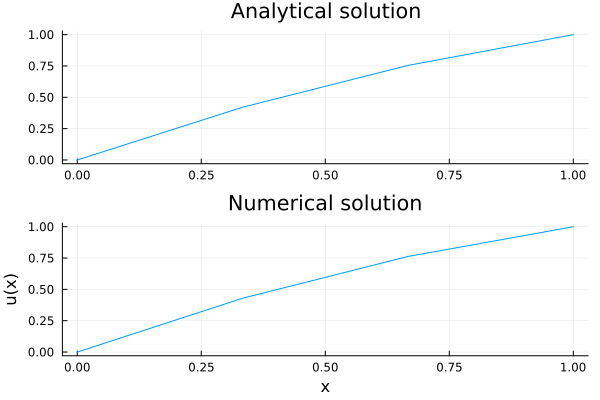

In [151]:
#..construct the mesh: see before 
nelements = 3; nnodes = nelements+1; h = 1/nelements
x = Vector(0:h:1)

#..Mesh with points and edges 
#..point holds the coordinates of the left and right node of the element
#..edges holds the global indices of the left and right node of the element
points = collect( [x[i], x[i+1]] for i in 1:nelements) #collecting points of value x
edges = collect( [i, i+1] for i in 1:nelements) 

#..Set the source function 
fsource(x) = sin(pi*x)
F(x) = (sin(pi*x))/pi*pi + x
F_a(x) = map(x->((sin(pi*x))/(pi*pi)) + x, x)


#..Initialize local and global matrix and right-hand side value 
floc = zeros(Float64,2, 1)
Aloc = zeros(Float64,2,2)
A = zeros(Float64,nnodes, nnodes)
f = zeros(Float64,nnodes)  

#..Perform loop over elements and assemble global matrix and vector 
for i=1:nelements 

  xl, xr = points[i,:][1]
  floc = (xr-xl)/2 * [fsource(xl), fsource(xr)]  #x(i+1) - x(i-1)/2 
  Aloc = (1/(xr-xl))*[1 -1; -1 1]
  for j=1:2 
    f[edges[i][j]] += floc[j]
    for k =1:2 
      A[edges[i][j], edges[i][k]] += Aloc[j,k]
    end 
  end 
end

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1;     A[1,2] = 0;        f[1]   = 0 
A[end,end-1]=0; A[end,end] = 1;    f[end] = 1

#..solve the linear system
u = A \ f


# Create a plot with two subplots (2x1 layout)
p1 = plot(x,  F_a(x), title="Analytical solution")
p2 = plot(x,u, title="Numerical solution")
xlabel!("x") 
ylabel!("u(x)")
plot(p1, p2, layout=(2, 1), legend=false)



In [71]:
display(f)

4-element Vector{Float64}:
 0.0
 0.28867513459481287
 0.28867513459481287
 1.0

We know that for fsource trapezoidal rule is used which is mentioned below.

- **Trapezoidal rule**: $( 0 \leq a < b \leq 1 )$

  $[
  \int_{a}^{b} g(x) \, dx \approx \frac{b - a}{2} \left[ g(a) + g(b) \right]
  ]$
  
Secondly the u(x) function is derived by integration by parts.

After that we get a 2X1 where it is computated as 

1st element: $[(fx_i)*h/2]$ 

2nd element: $[(fx_{i+1})*h/2]$

The matrix f does justify that with the dirichlet conditions


## Assignment 2

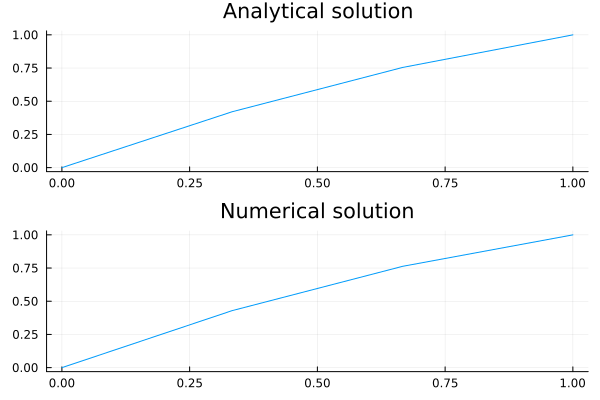

In [78]:
#..construct the 1D mesh
nelements = 3; nnodes = nelements+1; h = 1/(nelements); h2=h*h; 
x = Vector(0:h:1); 
xmid = x[1:end-1].+h/2;

#..construct the source function 
f = map(x->sin(pi*x), x)
alpha = 0;

#..construct the coefficient matrix with our the boundary conditions 
e = ones(nnodes); #..note that ones(N+1,1) does *not* work here 
A = Tridiagonal(-e[2:end], 2*e, -e[2:end]); 
A = (1/h2)*A; 

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1;          A[1,2] = 0;          f[1] = 0; 
A[end,end-1]=0;   A[end,end] = 1;    f[end] = 1;  
    
#..solve the linear system
u = A \ f; 

p2 = plot(x,u, title="Numerical solution")

plot(p1, p2, layout=(2, 1), legend=false)



In [76]:
display(f)

4-element Vector{Float64}:
 0.0
 0.8660254037844386
 0.8660254037844387
 1.0

The difference between two $f^h$ matrix is that FDM takes source function into consideration directly while in FEM we use a specific rule either trapezoidal or simpsons that is why it will be different.

## Assignment 3

In [165]:
#..construct the mesh: see before 
nelements = 3; nnodes = nelements+1; h = 1/nelements
x = Vector(0:h:1)

#..Mesh with points and edges 
#..point holds the coordinates of the left and right node of the element
#..edges holds the global indices of the left and right node of the element
points = collect( [x[i], x[i+1]] for i in 1:nelements) #collecting points of value x
edges = collect( [i, i+1] for i in 1:nelements) 

#..Set the source function 
fsource(x) = sin(pi*x)
F(x) = (sin(pi*x))/pi*pi + x
F_a(x) = map(x->((sin(pi*x))/(pi*pi)) + x, x)


#..Initialize local and global matrix and right-hand side value 
floc = zeros(Float64,2, 1)
Aloc = zeros(Float64,2,2)
A = zeros(Float64,nnodes, nnodes)
f = zeros(Float64,nnodes)  

#..Perform loop over elements and assemble global matrix and vector 
for i=1:nelements 

  xl, xr = points[i,:][1]
  floc = (xr-xl)/2 * [fsource(xl), fsource(xr)]  #x(i+1) - x(i-1)/2 
  Aloc = (1/(xr-xl))*[1 -1; -1 1]
  for j=1:2 
    f[edges[i][j]] += floc[j]
    for k =1:2 
      A[edges[i][j], edges[i][k]] += Aloc[j,k]
    end 
  end 
end

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1;     A[1,2] = 0;        f[1]   = 0 
A[end,end-1]=0; A[end,end] = 1;    f[end] = 1

#..solve the linear system
u = A \ f


# Create a plot with two subplots (2x1 layout)
p1 = plot(x,  F_a(x), title="Analytical solution")
p2 = plot(x,u, title="Numerical solution")
xlabel!("x") 
ylabel!("u(x)")
plot(p1, p2, layout=(2, 1), legend=false)

display(A)

4×4 Matrix{Float64}:
  1.0   0.0   0.0   0.0
 -3.0   6.0  -3.0   0.0
  0.0  -3.0   6.0  -3.0
  0.0   0.0   0.0   1.0

## Assignment 4

In [80]:
#..construct the 1D mesh
nelements = 3; nnodes = nelements+1; h = 1/(nelements); h2=h*h; 
x = Vector(0:h:1); 
xmid = x[1:end-1].+h/2;

#..construct the source function 
f = map(x->sin(pi*x), x)
alpha = 0;

#..construct the coefficient matrix with our the boundary conditions 
e = ones(nnodes); #..note that ones(N+1,1) does *not* work here 
A = Tridiagonal(-e[2:end], 2*e, -e[2:end]); 
A = (1/h2)*A; 

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1;          A[1,2] = 0;          f[1] = 0; 
A[end,end-1]=0;   A[end,end] = 1;    f[end] = 1;  
    
#..solve the linear system
u = A \ f; 

plot(x,u)

display(A)

4×4 Tridiagonal{Float64, Vector{Float64}}:
  1.0   0.0    ⋅     ⋅ 
 -9.0  18.0  -9.0    ⋅ 
   ⋅   -9.0  18.0  -9.0
   ⋅     ⋅    0.0   1.0

In finite difference methods (FDM), the matrix A typically represents coefficients from the discretization of derivatives in the differential equation which always uses uniform grids. While the matrix A in FEM is made by assembling local stiffness matrices that come from  approximation of the problem by the elements.









## Assignment 5

### FEM vs FDM for h=1/8

In [138]:
#..construct the mesh: see before 
nelements = 8; nnodes = nelements+1; h = 1/nelements
x = Vector(0:h:1)

#..Mesh with points and edges 
#..point holds the coordinates of the left and right node of the element
#..edges holds the global indices of the left and right node of the element
points = collect( [x[i], x[i+1]] for i in 1:nelements) #collecting points of value x
edges = collect( [i, i+1] for i in 1:nelements) 

#..Set the source function 
fsource(x) = sin(pi*x)
F(x) = (sin(pi*x))/pi*pi + x
F_a(x) = map(x->((sin(pi*x))/(pi*pi)) + x, x)


#..Initialize local and global matrix and right-hand side value 
floc = zeros(Float64,2, 1)
Aloc = zeros(Float64,2,2)
A = zeros(Float64,nnodes, nnodes)
f = zeros(Float64,nnodes)  

#..Perform loop over elements and assemble global matrix and vector 
for i=1:nelements 

  xl, xr = points[i,:][1]
  floc = (xr-xl)/2 * [fsource(xl), fsource(xr)]  #x(i+1) - x(i-1)/2 
  Aloc = (1/(xr-xl))*[1 -1; -1 1]
  for j=1:2 
    f[edges[i][j]] += floc[j]
    for k =1:2 
      A[edges[i][j], edges[i][k]] += Aloc[j,k]
    end 
  end 
end

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1;     A[1,2] = 0;        f[1]   = 0 
A[end,end-1]=0; A[end,end] = 1;    f[end] = 1

#..solve the linear system
u = A \ f


p1 = plot(x,u,shape=:circle,lw=2,legend=false, title="FEM h=1/8")
xlabel!("x") 
ylabel!("u(x)")
display("FEM")
display(u)



"FEM"

9-element Vector{Float64}:
 7.771561172376096e-16
 0.16427608978223385
 0.32257275093376236
 0.4698208686292511
 0.602633368629251
 0.7198208686292509
 0.8225727509337619
 0.9142760897822332
 1.0

In [139]:
#..construct the 1D mesh
nelements = 8; nnodes = nelements+1; h = 1/(nelements); h2=h*h; 
x = Vector(0:h:1); 
xmid = x[1:end-1].+h/2;

#..construct the source function 
f = map(x->sin(pi*x), x)
alpha = 0;

#..construct the coefficient matrix with our the boundary conditions 
e = ones(nnodes); #..note that ones(N+1,1) does *not* work here 
A = Tridiagonal(-e[2:end], 2*e, -e[2:end]); 
A = (1/h2)*A; 

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1;          A[1,2] = 0;          f[1] = 0; 
A[end,end-1]=0;   A[end,end] = 1;    f[end] = 1;  
    
#..solve the linear system
u = A \ f; 


p2 = plot(x,u,shape=:circle,lw=2,legend=false, title="FDM h=1/8")
xlabel!("x") 
ylabel!("u(x)")
display("FDM")
display(u)




"FDM"

9-element Vector{Float64}:
 -4.440892098500626e-16
  0.16427608978223285
  0.3225727509337616
  0.46982086862925054
  0.6026333686292507
  0.7198208686292508
  0.8225727509337619
  0.9142760897822332
  1.0

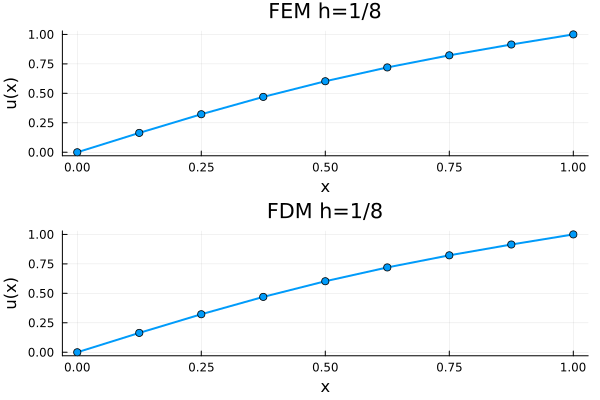

In [140]:
plot(p1,p2,layout=(2,1))

### FEM vs FDM for h=1/16

In [141]:
#..construct the mesh: see before 
nelements = 16; nnodes = nelements+1; h = 1/nelements
x = Vector(0:h:1)

#..Mesh with points and edges 
#..point holds the coordinates of the left and right node of the element
#..edges holds the global indices of the left and right node of the element
points = collect( [x[i], x[i+1]] for i in 1:nelements) #collecting points of value x
edges = collect( [i, i+1] for i in 1:nelements) 

#..Set the source function 
fsource(x) = sin(pi*x)
F(x) = (sin(pi*x))/pi*pi + x
F_a(x) = map(x->((sin(pi*x))/(pi*pi)) + x, x)


#..Initialize local and global matrix and right-hand side value 
floc = zeros(Float64,2, 1)
Aloc = zeros(Float64,2,2)
A = zeros(Float64,nnodes, nnodes)
f = zeros(Float64,nnodes)  

#..Perform loop over elements and assemble global matrix and vector 
for i=1:nelements 

  xl, xr = points[i,:][1]
  floc = (xr-xl)/2 * [fsource(xl), fsource(xr)]  #x(i+1) - x(i-1)/2 
  Aloc = (1/(xr-xl))*[1 -1; -1 1]
  for j=1:2 
    f[edges[i][j]] += floc[j]
    for k =1:2 
      A[edges[i][j], edges[i][k]] += Aloc[j,k]
    end 
  end 
end

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1;     A[1,2] = 0;        f[1]   = 0 
A[end,end-1]=0; A[end,end] = 1;    f[end] = 1

#..solve the linear system
u = A \ f


p1 = plot(x,u,shape=:circle,lw=2,legend=false, title="FEM h=1/16")
xlabel!("x") 
ylabel!("u(x)")
display("FEM")
display(u)



"FEM"

17-element Vector{Float64}:
 -3.164135620181696e-15
  0.08233041091329565
  0.16389875025621897
  0.24397223244146615
  0.3218755184039805
  0.39701666850248485
  0.4689098904279324
  0.5371942079295078
  0.601647332929508
  0.6621942079295082
  0.7189098904279333
  0.7720166685024862
  0.8218755184039822
  0.8689722324414683
  0.9138987502562215
  0.9573304109132985
  1.0

In [143]:
#..construct the 1D mesh
nelements = 16; nnodes = nelements+1; h = 1/(nelements); h2=h*h; 
x = Vector(0:h:1); 
xmid = x[1:end-1].+h/2;

#..construct the source function 
f = map(x->sin(pi*x), x)
alpha = 0;

#..construct the coefficient matrix with our the boundary conditions 
e = ones(nnodes); #..note that ones(N+1,1) does *not* work here 
A = Tridiagonal(-e[2:end], 2*e, -e[2:end]); 
A = (1/h2)*A; 

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1;          A[1,2] = 0;          f[1] = 0; 
A[end,end-1]=0;   A[end,end] = 1;    f[end] = 1;  
    
#..solve the linear system
u = A \ f; 


p2 = plot(x,u,shape=:circle,lw=2,legend=false, title="FDM h=1/16")
xlabel!("x") 
ylabel!("u(x)")
display("FDM")
display(u)




"FDM"

17-element Vector{Float64}:
 2.7755575615628914e-16
 0.08233041091329879
 0.1638987502562218
 0.2439722324414687
 0.32187551840398276
 0.39701666850248685
 0.4689098904279341
 0.5371942079295091
 0.6016473329295091
 0.6621942079295091
 0.7189098904279341
 0.7720166685024867
 0.8218755184039825
 0.8689722324414684
 0.9138987502562215
 0.9573304109132985
 1.0

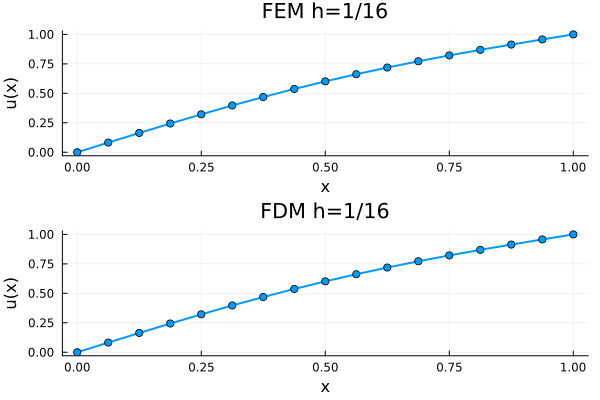

In [144]:
plot(p1,p2,layout=(2,1))

### FEM vs FDM for h=1/32

In [147]:
#..construct the mesh: see before 
nelements = 32; nnodes = nelements+1; h = 1/nelements
x = Vector(0:h:1)

#..Mesh with points and edges 
#..point holds the coordinates of the left and right node of the element
#..edges holds the global indices of the left and right node of the element
points = collect( [x[i], x[i+1]] for i in 1:nelements) #collecting points of value x
edges = collect( [i, i+1] for i in 1:nelements) 

#..Set the source function 
fsource(x) = sin(pi*x)
F(x) = (sin(pi*x))/pi*pi + x
F_a(x) = map(x->((sin(pi*x))/(pi*pi)) + x, x)


#..Initialize local and global matrix and right-hand side value 
floc = zeros(Float64,2, 1)
Aloc = zeros(Float64,2,2)
A = zeros(Float64,nnodes, nnodes)
f = zeros(Float64,nnodes)  

#..Perform loop over elements and assemble global matrix and vector 
for i=1:nelements 

  xl, xr = points[i,:][1]
  floc = (xr-xl)/2 * [fsource(xl), fsource(xr)]  #x(i+1) - x(i-1)/2 
  Aloc = (1/(xr-xl))*[1 -1; -1 1]
  for j=1:2 
    f[edges[i][j]] += floc[j]
    for k =1:2 
      A[edges[i][j], edges[i][k]] += Aloc[j,k]
    end 
  end 
end

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1;     A[1,2] = 0;        f[1]   = 0 
A[end,end-1]=0; A[end,end] = 1;    f[end] = 1

#..solve the linear system
u = A \ f


p1 = plot(x,u,shape=:circle,lw=2,legend=false, title="FEM h=1/32")
xlabel!("x") 
ylabel!("u(x)")
display("FEM")
display(u)



"FEM"

33-element Vector{Float64}:
 5.537237335317968e-15
 0.0411891931762685
 0.08228266648892837
 0.12318562190899437
 0.16380509619892905
 0.20405085619944469
 0.24383626782415369
 0.2830791303931795
 0.32170246827063925
 0.3596352721820965
 0.3968131830726917
 0.4331791119200227
 0.46868378953263845
 ⋮
 0.7456791119200205
 0.7718131830726891
 0.7971352721820936
 0.821702468270636
 0.8455791303931759
 0.8688362678241498
 0.8915508561994405
 0.9138050961989246
 0.9356856219089896
 0.9572826664889234
 0.9786891931762632
 1.0

In [148]:
#..construct the 1D mesh
nelements = 32; nnodes = nelements+1; h = 1/(nelements); h2=h*h; 
x = Vector(0:h:1); 
xmid = x[1:end-1].+h/2;

#..construct the source function 
f = map(x->sin(pi*x), x)
alpha = 0;

#..construct the coefficient matrix with our the boundary conditions 
e = ones(nnodes); #..note that ones(N+1,1) does *not* work here 
A = Tridiagonal(-e[2:end], 2*e, -e[2:end]); 
A = (1/h2)*A; 

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1;          A[1,2] = 0;          f[1] = 0; 
A[end,end-1]=0;   A[end,end] = 1;    f[end] = 1;  
    
#..solve the linear system
u = A \ f; 


p2 = plot(x,u,shape=:circle,lw=2,legend=false, title="FDM h=1/32")
xlabel!("x") 
ylabel!("u(x)")
display("FDM")
display(u)




"FDM"

33-element Vector{Float64}:
 -8.396061623727746e-15
  0.0411891931762553
  0.08228266648891591
  0.12318562190898263
  0.16380509619891803
  0.20405085619943442
  0.24383626782414414
  0.2830791303931707
  0.3217024682706312
  0.35963527218208924
  0.3968131830726852
  0.433179111920017
  0.4686837895326337
  ⋮
  0.7456791119200202
  0.7718131830726889
  0.7971352721820933
  0.8217024682706358
  0.8455791303931758
  0.8688362678241497
  0.8915508561994404
  0.9138050961989246
  0.9356856219089896
  0.9572826664889234
  0.9786891931762632
  1.0

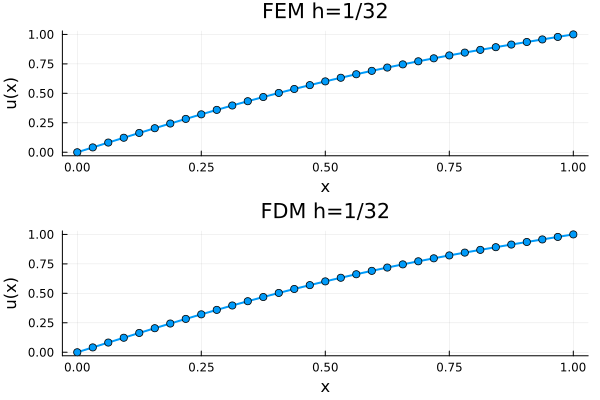

In [149]:
plot(p1,p2,layout=(2,1))

Currently both look the same and very minimal difference but in general, as h gets smaller, the difference between the FD and FE approximations should decrease, and both should converge towards the true solution. 

## Assignment 6

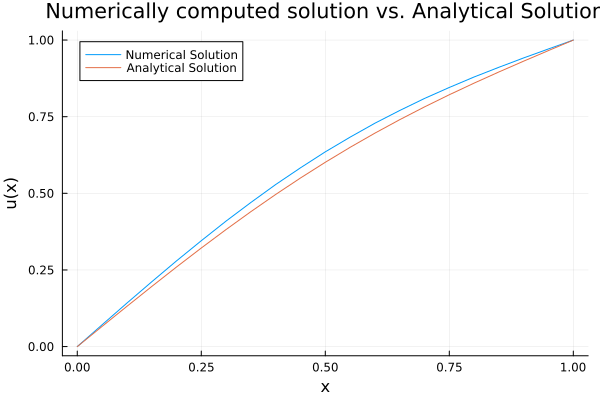

In [54]:

using SymPy
nelements = 10; nnodes = 2*nelements+1; h = 1/nelements; h2=h*h; 
a = Vector(0:h:1); 
xmid = a[1:end-1].+h/2;


points = collect([a[i], xmid[i], a[i+1]] for i in 1:nelements);


edges = collect([2*i-1, 2*i, 2*i+1] for i in 1:nelements);
fsource(a) = sin(pi*a)

A = zeros((2*nelements+1),(2*nelements+1));

floc = zeros(Float64,3, 1)
f = zeros(Float64,nnodes) 


for i in 1:nelements
    @syms x
    phi1 = (x - points[i][2]) * (x - points[i][3]) / ((points[i][1] - points[i][2]) * (points[i][1] - points[i][3]));
    phi2 = (x - points[i][1]) * (x - points[i][3]) / ((points[i][2] - points[i][1]) * (points[i][2] - points[i][3]));
    phi3 = (x - points[i][1]) * (x - points[i][2]) / ((points[i][3] - points[i][1]) * (points[i][3] - points[i][2]));
    dphi = [diff(phi, x) for phi in [phi1, phi2, phi3]];
    
    xl, xm, xr = points[i]
    floc = h/3*[fsource(xl),2*fsource((xl+xr)/2),fsource(xr)]
        Aloc = [integrate(dphi[j] * dphi[k], (x, xl, xr)) for j in 1:3, k in 1:3];

    # Assembly into global matrix A
    global_nodes = edges[i]
    for j in 1:3
        global_node = edges[i][j]
         if global_node <= length(f)
             f[global_node] += floc[j]
        for k in 1:3
            A[global_nodes[j], global_nodes[k]] += Aloc[j,k]
            end
        end
    end
end


#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1;     A[1,2] = 0; A[1,3] =0;       f[1]   = 0 
A[end,end-1]=0; A[end,end] = 1;  A[end,end-2]=0;  f[end] = 1



#..solve the linear system
u = A \ f
X = Vector(0:h/2:1)
F_a(x) = sin(pi*x)/(pi*pi) + x

F_a1 = F_a.(X) 

# Plot the numerical and analytical solutions
plot(X, u, label="Numerical Solution")
plot!(X, F_a1, label="Analytical Solution")

# Add labels and title
xlabel!("x") 
ylabel!("u(x)")
title!("Numerically computed solution vs. Analytical Solution")

# Show the plot
display(plot)

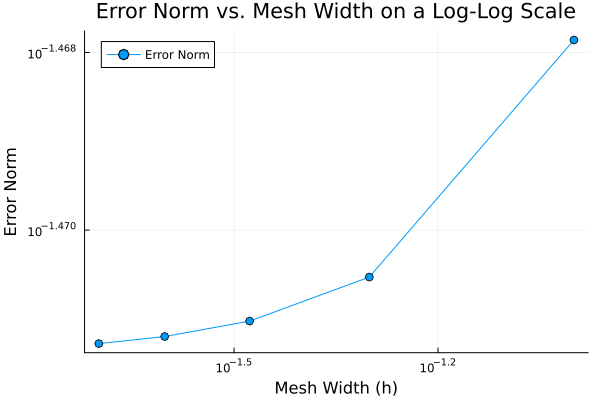

In [174]:

using SymPy
mesh_widths=[]
errors=[]
n_e = Vector(10:10:50)
function calculate_error(n)
    nelements = n; nnodes = 2*nelements+1; h = 1/nelements; h2=h*h; 
    a = Vector(0:h:1); 
    xmid = a[1:end-1].+h/2;


    points = collect([a[i], xmid[i], a[i+1]] for i in 1:nelements);


    edges = collect([2*i-1, 2*i, 2*i+1] for i in 1:nelements);
    fsource(a) = sin(pi*a)

    A = zeros((2*nelements+1),(2*nelements+1));

    floc = zeros(Float64,3, 1)
    f = zeros(Float64,nnodes) 


    for i in 1:nelements
        @syms x
        phi1 = (x - points[i][2]) * (x - points[i][3]) / ((points[i][1] - points[i][2]) * (points[i][1] - points[i][3]));
        phi2 = (x - points[i][1]) * (x - points[i][3]) / ((points[i][2] - points[i][1]) * (points[i][2] - points[i][3]));
        phi3 = (x - points[i][1]) * (x - points[i][2]) / ((points[i][3] - points[i][1]) * (points[i][3] - points[i][2]));
        dphi = [diff(phi, x) for phi in [phi1, phi2, phi3]];
    
        xl, xm, xr = points[i]
        floc = h/3*[fsource(xl),2*fsource((xl+xr)/2),fsource(xr)]
        Aloc = [integrate(dphi[j] * dphi[k], (x, xl, xr)) for j in 1:3, k in 1:3];

        # Assembly into global matrix A
        global_nodes = edges[i]
        for j in 1:3
            global_node = edges[i][j]
             if global_node <= length(f)
                 f[global_node] += floc[j]
            for k in 1:3
                A[global_nodes[j], global_nodes[k]] += Aloc[j,k]
                end
            end
        end
    end


    #..handle the boundary conditions in the matrix and right-hand side vector 
    A[1,1] = 1;     A[1,2] = 0; A[1,3] =0;       f[1]   = 0 
    A[end,end-1]=0; A[end,end] = 1;  A[end,end-2]=0;  f[end] = 1



    #..solve the linear system
    u = A \ f
    X = Vector(0:h/2:1)
    F_a(x) = sin(pi*x)/(pi*pi) + x

    F_a1 = F_a.(X) 
    error = F_a1-u;

    error_norm = norm(error,Inf)
    return h, error_norm
end
    
    
for n in n_e
    h, error_norm = calculate_error(n)
    push!(mesh_widths, h)
    push!(errors, error_norm)
end

# Plot the error on a log-log scale
p1 = plot(mesh_widths, errors, m=:o, xscale=:log10, yscale=:log10,
     xlabel="Mesh Width (h)", ylabel="Error Norm",
     title="Error Norm vs. Mesh Width on a Log-Log Scale",
     label="Error Norm")

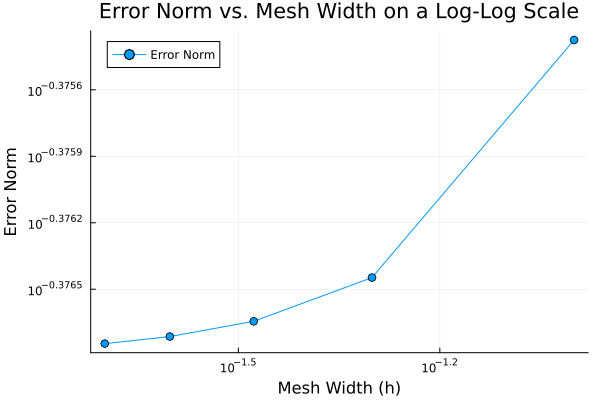

In [178]:

using SymPy
n_e = Vector(10:10:50)
errors = []
mesh_widths = []

function calculate_error(n)
    nelements = n; nnodes = nelements+1; h = 1/nelements
    x = Vector(0:h:1)


    points = collect( [x[i], x[i+1]] for i in 1:nelements) #collecting points of value x
    edges = collect( [i, i+1] for i in 1:nelements) 

#..Set the source function 
    fsource(x) = 0

    alpha = 10;
    #..Initialize local and global matrix and right-hand side value 
    floc = zeros(Float64,2, 1)
    Aloc = zeros(Float64,2,2)
    Mloc = zeros(Float64,2,2)
    A = zeros(Float64,nnodes, nnodes)
    A1 = zeros(Float64,nnodes, nnodes)
    M = zeros(Float64,nnodes, nnodes)
    f = zeros(Float64,nnodes)  

    #..Perform loop over elements and assemble global matrix and vector 
    for i=1:nelements 
        

        xl, xr = points[i,:][1]
        floc = (xr-xl)/2 * [fsource(xl), fsource(xr)]  
        Aloc = (1/(xr-xl))*[1 -1; -1 1]
        Mloc = (xr-xl)*[1/3 1/6; 1/6 1/3];
        for j=1:2 
          f[edges[i][j]] += floc[j]
        for k =1:2 
          A1[edges[i][j], edges[i][k]] += Aloc[j,k]
          M[edges[i][j], edges[i][k]] += Mloc[j,k]
        end 
  end 
end

    A = A1 + alpha*M

    #..handle the boundary conditions in the matrix and right-hand side vector 
    A[1,1] = 1;     A[1,2] = 0;        f[1]   = 0 
    A[end,end-1]=0; A[end,end] = 1;    f[end] = 1

#..solve the linear system
    u = A \ f
    X = Vector(0:h:1)
    F_a2(x) = sin(pi*x)/(pi*pi) + x
    F_a3 = F_a2.(X)
    error = F_a3-u;
    error_norm = norm(error,Inf)
    return h, error_norm
end

for n in n_e
    h, error_norm = calculate_error(n)
    push!(mesh_widths, h)
    push!(errors, error_norm)
end


# Plot the error on a log-log scale
p1 = plot(mesh_widths, errors, m=:o, xscale=:log10, yscale=:log10,
     xlabel="Mesh Width (h)", ylabel="Error Norm",
     title="Error Norm vs. Mesh Width on a Log-Log Scale",
     label="Error Norm")

1) The error norm increases with increase in mesh width
2)The first order elements have more than second order elements

## Assignment 7

#### 7.1

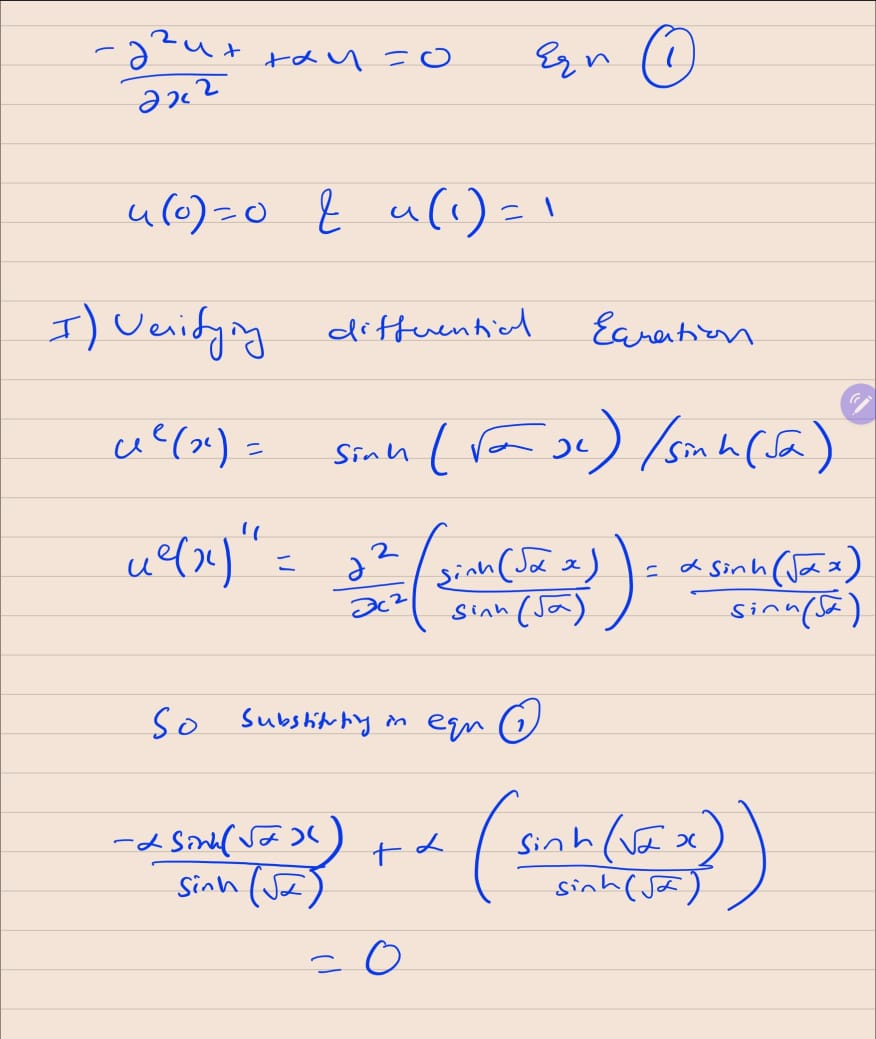

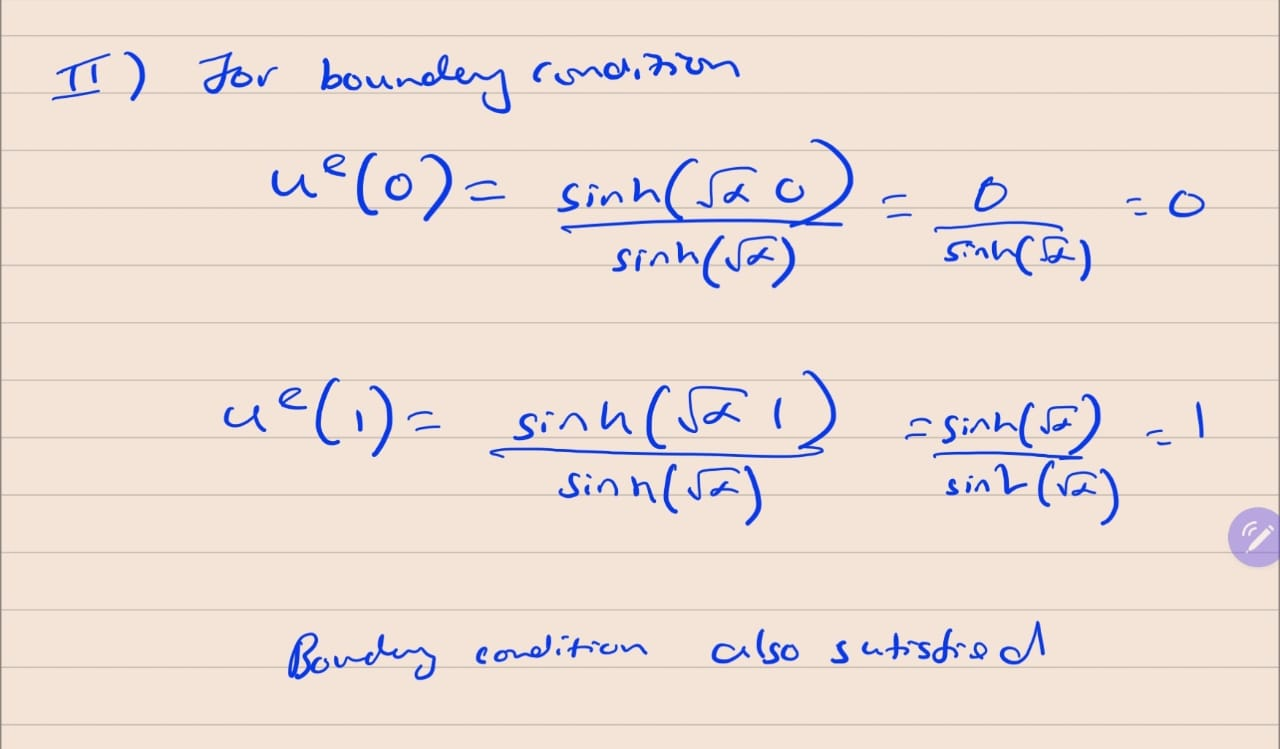


$\alpha$ in the eddy-current problem mimics the value which kind of relates to the force it tries to resist. Basically alpha could be higher electrical conductivity or like high frequency of magnetic field. It represents how strong the eddy current is. 

#### 7.2

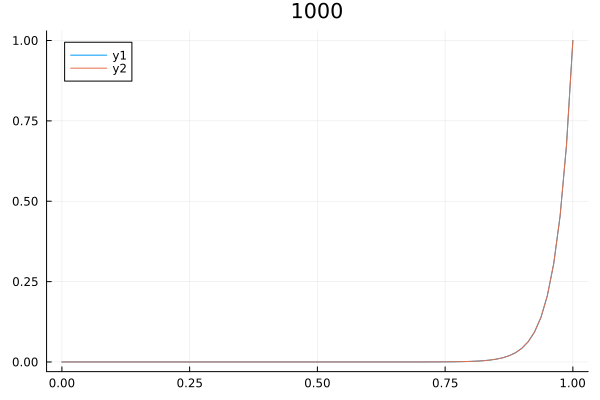

In [170]:
using SymPy
nelements = 40; nnodes = 2*nelements+1; h = 1/nelements; h2=h*h; 
a = Vector(0:h:1); 
xmid = a[1:end-1].+h/2;

alpha1 = 1000;

points = collect([a[i], xmid[i], a[i+1]] for i in 1:nelements);


edges = collect([2*i-1, 2*i, 2*i+1] for i in 1:nelements);
fsource(a) = 0;

A = zeros((2*nelements+1),(2*nelements+1));
Al = zeros((2*nelements+1),(2*nelements+1));
floc = zeros(Float64,3, 1)
f = zeros(Float64,nnodes) 
M = zeros((2*nelements+1),(2*nelements+1));


for i in 1:nelements
    @syms x
    phi1 = (x - points[i][2]) * (x - points[i][3]) / ((points[i][1] - points[i][2]) * (points[i][1] - points[i][3]));
    phi2 = (x - points[i][1]) * (x - points[i][3]) / ((points[i][2] - points[i][1]) * (points[i][2] - points[i][3]));
    phi3 = (x - points[i][1]) * (x - points[i][2]) / ((points[i][3] - points[i][1]) * (points[i][3] - points[i][2]));
    dphi = [diff(phi, x) for phi in [phi1, phi2, phi3]];
    
    xl, xm, xr = points[i]
    Aloc = [integrate(dphi[j] * dphi[k], (x, xl, xr)) for j in 1:3, k in 1:3];
    phi = [phi1 , phi2, phi3]
    
    Mloc = [integrate(phi[j] * phi[k], (x, xl, xr)) for j in 1:3, k in 1:3];
    #for j in 1:3
    #    for k in 1:3
    #        M[j,k] = integrate(dphi[j]*dphi[k], (x, 0, 1))
    #    end
    #end

    #M = -alpha1 .* M

    floc = h/3 * [fsource(points[i][1]), 2*fsource((points[i][1]+points[i][3])/2), fsource(points[i][3])]

    # Assemble local matrices into the global matrix A
    global_nodes = edges[i]
    for j in 1:3
        f[global_nodes[j]] += floc[j]
        for k in 1:3
            Al[global_nodes[j], global_nodes[k]] += Aloc[j,k]
            M[global_nodes[j], global_nodes[k]] += Mloc[j,k]
        end
    end
end


A = Al + alpha1*M;

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1;     A[1,2] = 0; A[1,3] =0;       f[1]   = 0 
A[end,end-1]=0; A[end,end] = 1;  A[end,end-2]=0;  f[end] = 1



#..solve the linear system
u = A \ f
X = Vector(0:h/2:1)
F_s(x) = sinh(sqrt(alpha1)*x)/sinh(sqrt(alpha1));
F_sa = F_s.(X)
plot(X,[u, F_sa],title = "1000")
   

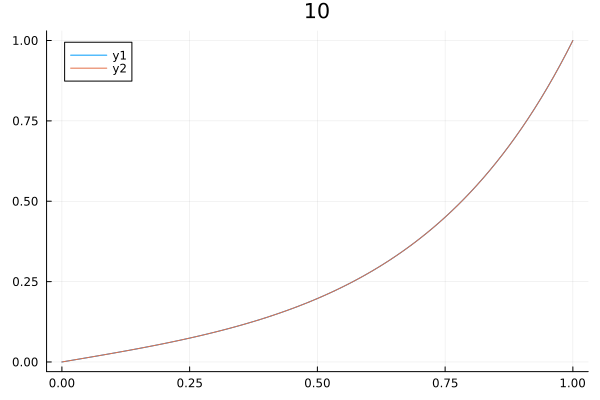

In [171]:
using SymPy
nelements = 40; nnodes = 2*nelements+1; h = 1/nelements; h2=h*h; 
a = Vector(0:h:1); 
xmid = a[1:end-1].+h/2;

alpha1 = 10;

points = collect([a[i], xmid[i], a[i+1]] for i in 1:nelements);


edges = collect([2*i-1, 2*i, 2*i+1] for i in 1:nelements);
fsource(a) = 0;

A = zeros((2*nelements+1),(2*nelements+1));
Al = zeros((2*nelements+1),(2*nelements+1));
floc = zeros(Float64,3, 1)
f = zeros(Float64,nnodes) 
M = zeros((2*nelements+1),(2*nelements+1));


for i in 1:nelements
    @syms x
    phi1 = (x - points[i][2]) * (x - points[i][3]) / ((points[i][1] - points[i][2]) * (points[i][1] - points[i][3]));
    phi2 = (x - points[i][1]) * (x - points[i][3]) / ((points[i][2] - points[i][1]) * (points[i][2] - points[i][3]));
    phi3 = (x - points[i][1]) * (x - points[i][2]) / ((points[i][3] - points[i][1]) * (points[i][3] - points[i][2]));
    dphi = [diff(phi, x) for phi in [phi1, phi2, phi3]];
    
    xl, xm, xr = points[i]
    Aloc = [integrate(dphi[j] * dphi[k], (x, xl, xr)) for j in 1:3, k in 1:3];
    phi = [phi1 , phi2, phi3]
    
    Mloc = [integrate(phi[j] * phi[k], (x, xl, xr)) for j in 1:3, k in 1:3];
    #for j in 1:3
    #    for k in 1:3
    #        M[j,k] = integrate(dphi[j]*dphi[k], (x, 0, 1))
    #    end
    #end

    #M = -alpha1 .* M

    floc = h/3 * [fsource(points[i][1]), 2*fsource((points[i][1]+points[i][3])/2), fsource(points[i][3])]

    # Assemble local matrices into the global matrix A
    global_nodes = edges[i]
    for j in 1:3
        f[global_nodes[j]] += floc[j]
        for k in 1:3
            Al[global_nodes[j], global_nodes[k]] += Aloc[j,k]
            M[global_nodes[j], global_nodes[k]] += Mloc[j,k]
        end
    end
end


A = Al + alpha1*M;

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1;     A[1,2] = 0; A[1,3] =0;       f[1]   = 0 
A[end,end-1]=0; A[end,end] = 1;  A[end,end-2]=0;  f[end] = 1



#..solve the linear system
u = A \ f
X = Vector(0:h/2:1)
F_s(x) = sinh(sqrt(alpha1)*x)/sinh(sqrt(alpha1));
F_sa = F_s.(X)
plot(X,[u, F_sa],title = "10")
   

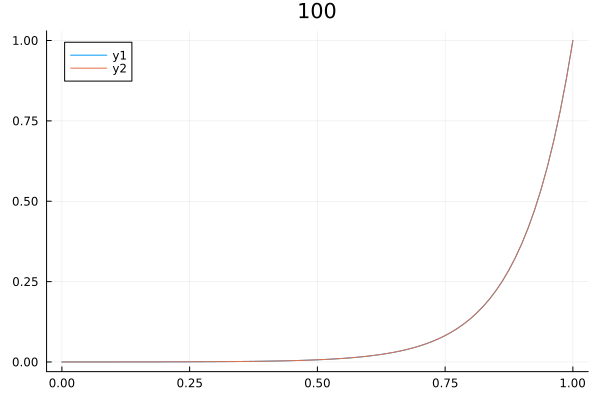

In [172]:
using SymPy
nelements = 40; nnodes = 2*nelements+1; h = 1/nelements; h2=h*h; 
a = Vector(0:h:1); 
xmid = a[1:end-1].+h/2;

alpha1 = 100;

points = collect([a[i], xmid[i], a[i+1]] for i in 1:nelements);


edges = collect([2*i-1, 2*i, 2*i+1] for i in 1:nelements);
fsource(a) = 0;

A = zeros((2*nelements+1),(2*nelements+1));
Al = zeros((2*nelements+1),(2*nelements+1));
floc = zeros(Float64,3, 1)
f = zeros(Float64,nnodes) 
M = zeros((2*nelements+1),(2*nelements+1));


for i in 1:nelements
    @syms x
    phi1 = (x - points[i][2]) * (x - points[i][3]) / ((points[i][1] - points[i][2]) * (points[i][1] - points[i][3]));
    phi2 = (x - points[i][1]) * (x - points[i][3]) / ((points[i][2] - points[i][1]) * (points[i][2] - points[i][3]));
    phi3 = (x - points[i][1]) * (x - points[i][2]) / ((points[i][3] - points[i][1]) * (points[i][3] - points[i][2]));
    dphi = [diff(phi, x) for phi in [phi1, phi2, phi3]];
    
    xl, xm, xr = points[i]
    Aloc = [integrate(dphi[j] * dphi[k], (x, xl, xr)) for j in 1:3, k in 1:3];
    phi = [phi1 , phi2, phi3]
    
    Mloc = [integrate(phi[j] * phi[k], (x, xl, xr)) for j in 1:3, k in 1:3];
    #for j in 1:3
    #    for k in 1:3
    #        M[j,k] = integrate(dphi[j]*dphi[k], (x, 0, 1))
    #    end
    #end

    #M = -alpha1 .* M

    floc = h/3 * [fsource(points[i][1]), 2*fsource((points[i][1]+points[i][3])/2), fsource(points[i][3])]

    # Assemble local matrices into the global matrix A
    global_nodes = edges[i]
    for j in 1:3
        f[global_nodes[j]] += floc[j]
        for k in 1:3
            Al[global_nodes[j], global_nodes[k]] += Aloc[j,k]
            M[global_nodes[j], global_nodes[k]] += Mloc[j,k]
        end
    end
end


A = Al + alpha1*M;

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1;     A[1,2] = 0; A[1,3] =0;       f[1]   = 0 
A[end,end-1]=0; A[end,end] = 1;  A[end,end-2]=0;  f[end] = 1



#..solve the linear system
u = A \ f
X = Vector(0:h/2:1)
F_s(x) = sinh(sqrt(alpha1)*x)/sinh(sqrt(alpha1));
F_sa = F_s.(X)
plot(X,[u, F_sa],title = "100")
   

#### 7.3 and 7.4
First I did second order basis functions and then first order basis function.

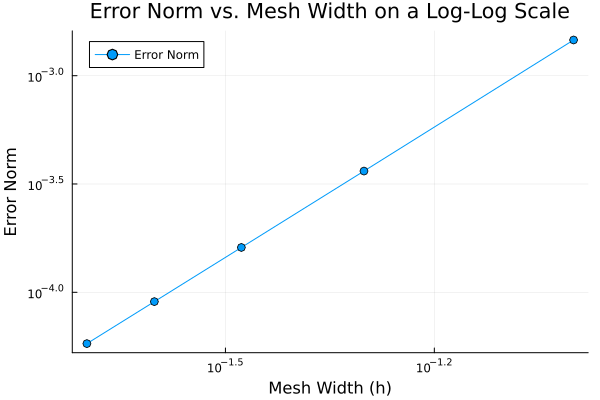

In [195]:

using SymPy
n_e = Vector(10:10:50)
errors = []
mesh_widths = []

function calculate_error(n)
    nelements = n; nnodes = nelements+1; h = 1/nelements
    x = Vector(0:h:1)


    points = collect( [x[i], x[i+1]] for i in 1:nelements) #collecting points of value x
    edges = collect( [i, i+1] for i in 1:nelements) 

#..Set the source function 
    fsource(x) = 0

    alpha = 10;
    #..Initialize local and global matrix and right-hand side value 
    floc = zeros(Float64,2, 1)
    Aloc = zeros(Float64,2,2)
    Mloc = zeros(Float64,2,2)
    A = zeros(Float64,nnodes, nnodes)
    A1 = zeros(Float64,nnodes, nnodes)
    M = zeros(Float64,nnodes, nnodes)
    f = zeros(Float64,nnodes)  

    #..Perform loop over elements and assemble global matrix and vector 
    for i=1:nelements 
        

        xl, xr = points[i,:][1]
        floc = (xr-xl)/2 * [fsource(xl), fsource(xr)]  
        Aloc = (1/(xr-xl))*[1 -1; -1 1]
        Mloc = (xr-xl)*[1/3 1/6; 1/6 1/3];
        for j=1:2 
          f[edges[i][j]] += floc[j]
        for k =1:2 
          A1[edges[i][j], edges[i][k]] += Aloc[j,k]
          M[edges[i][j], edges[i][k]] += Mloc[j,k]
        end 
  end 
end

    A = A1 + alpha*M

    #..handle the boundary conditions in the matrix and right-hand side vector 
    A[1,1] = 1;     A[1,2] = 0;        f[1]   = 0 
    A[end,end-1]=0; A[end,end] = 1;    f[end] = 1

#..solve the linear system
    u = A \ f
    X = Vector(0:h:1)
    F_s(x) = sinh(sqrt(alpha1)*x)/sinh(sqrt(alpha1));
    F_sa = F_s.(X)
    error = F_sa-u;
    error_norm = norm(error,Inf)
    return h, error_norm
    
end

for n in n_e
    h, error_norm = calculate_error(n)
    push!(mesh_widths, h)
    push!(errors, error_norm)
end


# Plot the error on a log-log scale
p1 = plot(mesh_widths, errors, m=:o, xscale=:log10, yscale=:log10,
     xlabel="Mesh Width (h)", ylabel="Error Norm",
     title="Error Norm vs. Mesh Width on a Log-Log Scale",
     label="Error Norm")

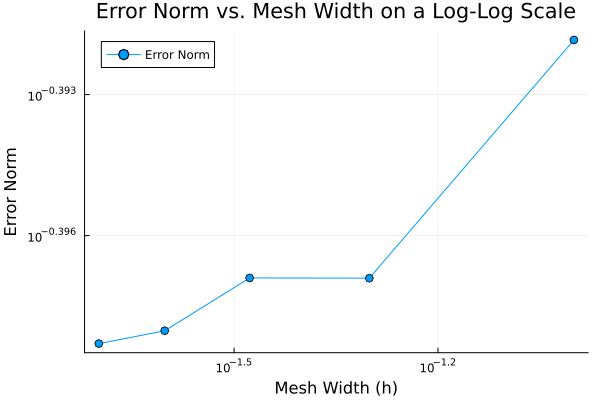

In [196]:

using SymPy
n_e = Vector(10:10:50)
errors = []
mesh_widths = []

function calculate_error(n)
    nelements = n; nnodes = nelements+1; h = 1/nelements
    x = Vector(0:h:1)


    points = collect( [x[i], x[i+1]] for i in 1:nelements) #collecting points of value x
    edges = collect( [i, i+1] for i in 1:nelements) 

#..Set the source function 
    fsource(x) = 0

    alpha = 100;
    #..Initialize local and global matrix and right-hand side value 
    floc = zeros(Float64,2, 1)
    Aloc = zeros(Float64,2,2)
    Mloc = zeros(Float64,2,2)
    A = zeros(Float64,nnodes, nnodes)
    A1 = zeros(Float64,nnodes, nnodes)
    M = zeros(Float64,nnodes, nnodes)
    f = zeros(Float64,nnodes)  

    #..Perform loop over elements and assemble global matrix and vector 
    for i=1:nelements 
        

        xl, xr = points[i,:][1]
        floc = (xr-xl)/2 * [fsource(xl), fsource(xr)]  
        Aloc = (1/(xr-xl))*[1 -1; -1 1]
        Mloc = (xr-xl)*[1/3 1/6; 1/6 1/3];
        for j=1:2 
          f[edges[i][j]] += floc[j]
        for k =1:2 
          A1[edges[i][j], edges[i][k]] += Aloc[j,k]
          M[edges[i][j], edges[i][k]] += Mloc[j,k]
        end 
  end 
end

    A = A1 + alpha*M

    #..handle the boundary conditions in the matrix and right-hand side vector 
    A[1,1] = 1;     A[1,2] = 0;        f[1]   = 0 
    A[end,end-1]=0; A[end,end] = 1;    f[end] = 1

#..solve the linear system
    u = A \ f
    X = Vector(0:h:1)
    F_s(x) = sinh(sqrt(alpha1)*x)/sinh(sqrt(alpha1));
    F_sa = F_s.(X)
    error = F_sa-u;
    error_norm = norm(error,Inf)
    return h, error_norm
    
end

for n in n_e
    h, error_norm = calculate_error(n)
    push!(mesh_widths, h)
    push!(errors, error_norm)
end


# Plot the error on a log-log scale
p1 = plot(mesh_widths, errors, m=:o, xscale=:log10, yscale=:log10,
     xlabel="Mesh Width (h)", ylabel="Error Norm",
     title="Error Norm vs. Mesh Width on a Log-Log Scale",
     label="Error Norm")

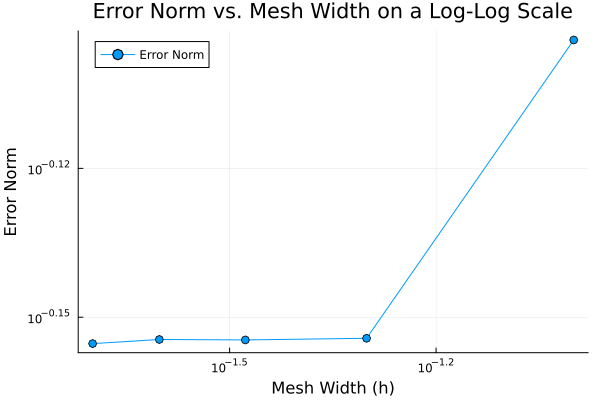

In [197]:

using SymPy
n_e = Vector(10:10:50)
errors = []
mesh_widths = []

function calculate_error(n)
    nelements = n; nnodes = nelements+1; h = 1/nelements
    x = Vector(0:h:1)


    points = collect( [x[i], x[i+1]] for i in 1:nelements) #collecting points of value x
    edges = collect( [i, i+1] for i in 1:nelements) 

#..Set the source function 
    fsource(x) = 0

    alpha = 1000;
    #..Initialize local and global matrix and right-hand side value 
    floc = zeros(Float64,2, 1)
    Aloc = zeros(Float64,2,2)
    Mloc = zeros(Float64,2,2)
    A = zeros(Float64,nnodes, nnodes)
    A1 = zeros(Float64,nnodes, nnodes)
    M = zeros(Float64,nnodes, nnodes)
    f = zeros(Float64,nnodes)  

    #..Perform loop over elements and assemble global matrix and vector 
    for i=1:nelements 
        

        xl, xr = points[i,:][1]
        floc = (xr-xl)/2 * [fsource(xl), fsource(xr)]  
        Aloc = (1/(xr-xl))*[1 -1; -1 1]
        Mloc = (xr-xl)*[1/3 1/6; 1/6 1/3];
        for j=1:2 
          f[edges[i][j]] += floc[j]
        for k =1:2 
          A1[edges[i][j], edges[i][k]] += Aloc[j,k]
          M[edges[i][j], edges[i][k]] += Mloc[j,k]
        end 
  end 
end

    A = A1 + alpha*M

    #..handle the boundary conditions in the matrix and right-hand side vector 
    A[1,1] = 1;     A[1,2] = 0;        f[1]   = 0 
    A[end,end-1]=0; A[end,end] = 1;    f[end] = 1

#..solve the linear system
    u = A \ f
    X = Vector(0:h:1)
    F_s(x) = sinh(sqrt(alpha1)*x)/sinh(sqrt(alpha1));
    F_sa = F_s.(X)
    error = F_sa-u;
    error_norm = norm(error,Inf)
    return h, error_norm
    
end

for n in n_e
    h, error_norm = calculate_error(n)
    push!(mesh_widths, h)
    push!(errors, error_norm)
end


# Plot the error on a log-log scale
p1 = plot(mesh_widths, errors, m=:o, xscale=:log10, yscale=:log10,
     xlabel="Mesh Width (h)", ylabel="Error Norm",
     title="Error Norm vs. Mesh Width on a Log-Log Scale",
     label="Error Norm")


alpha = 10

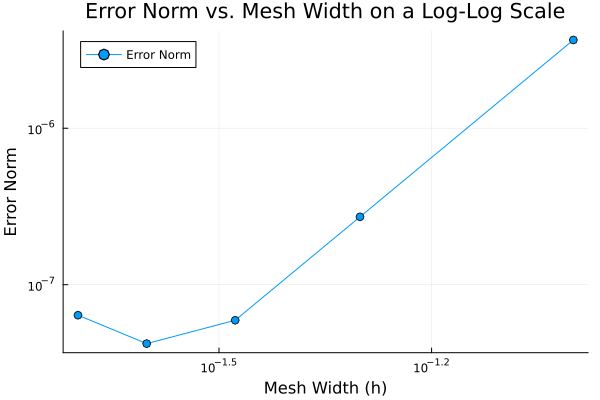

In [192]:

using SymPy
n_e = Vector(10:10:50)
errors = []
mesh_widths = []

function calculate_error(n)
    nelements = n; nnodes = 2*nelements+1; h = 1/nelements; h2=h*h; 
a = Vector(0:h:1); 
xmid = a[1:end-1].+h/2;

alpha1 = 10;

points = collect([a[i], xmid[i], a[i+1]] for i in 1:nelements);


edges = collect([2*i-1, 2*i, 2*i+1] for i in 1:nelements);
fsource(a) = 0;

A = zeros((2*nelements+1),(2*nelements+1));
Al = zeros((2*nelements+1),(2*nelements+1));
floc = zeros(Float64,3, 1)
f = zeros(Float64,nnodes) 
M = zeros((2*nelements+1),(2*nelements+1));


for i in 1:nelements
    @syms x
    phi1 = (x - points[i][2]) * (x - points[i][3]) / ((points[i][1] - points[i][2]) * (points[i][1] - points[i][3]));
    phi2 = (x - points[i][1]) * (x - points[i][3]) / ((points[i][2] - points[i][1]) * (points[i][2] - points[i][3]));
    phi3 = (x - points[i][1]) * (x - points[i][2]) / ((points[i][3] - points[i][1]) * (points[i][3] - points[i][2]));
    dphi = [diff(phi, x) for phi in [phi1, phi2, phi3]];
    
    xl, xm, xr = points[i]
    Aloc = [integrate(dphi[j] * dphi[k], (x, xl, xr)) for j in 1:3, k in 1:3];
    phi = [phi1 , phi2, phi3]
    
    Mloc = [integrate(phi[j] * phi[k], (x, xl, xr)) for j in 1:3, k in 1:3];
    #for j in 1:3
    #    for k in 1:3
    #        M[j,k] = integrate(dphi[j]*dphi[k], (x, 0, 1))
    #    end
    #end

    #M = -alpha1 .* M

    floc = h/3 * [fsource(points[i][1]), 2*fsource((points[i][1]+points[i][3])/2), fsource(points[i][3])]

    # Assemble local matrices into the global matrix A
    global_nodes = edges[i]
    for j in 1:3
        f[global_nodes[j]] += floc[j]
        for k in 1:3
            Al[global_nodes[j], global_nodes[k]] += Aloc[j,k]
            M[global_nodes[j], global_nodes[k]] += Mloc[j,k]
        end
    end
end


A = Al + alpha1*M;

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1;     A[1,2] = 0; A[1,3] =0;       f[1]   = 0 
A[end,end-1]=0; A[end,end] = 1;  A[end,end-2]=0;  f[end] = 1



#..solve the linear system
u = A \ f
X = Vector(0:h/2:1)
F_s(x) = sinh(sqrt(alpha1)*x)/sinh(sqrt(alpha1));
F_sa = F_s.(X)
    error = F_sa-u;
    error_norm = norm(error,Inf)
    return h, error_norm
end

for n in n_e
    h, error_norm = calculate_error(n)
    push!(mesh_widths, h)
    push!(errors, error_norm)
end


# Plot the error on a log-log scale
p1 = plot(mesh_widths, errors, m=:o, xscale=:log10, yscale=:log10,
     xlabel="Mesh Width (h)", ylabel="Error Norm",
     title="Error Norm vs. Mesh Width on a Log-Log Scale",
     label="Error Norm")

Alpha = 100

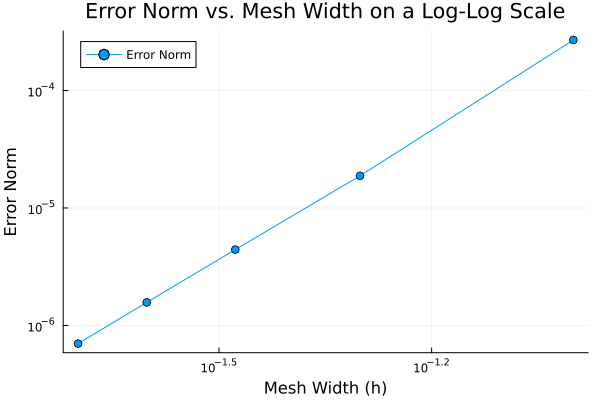

In [193]:

using SymPy
n_e = Vector(10:10:50)
errors = []
mesh_widths = []

function calculate_error(n)
    nelements = n; nnodes = 2*nelements+1; h = 1/nelements; h2=h*h; 
a = Vector(0:h:1); 
xmid = a[1:end-1].+h/2;

alpha1 = 100;

points = collect([a[i], xmid[i], a[i+1]] for i in 1:nelements);


edges = collect([2*i-1, 2*i, 2*i+1] for i in 1:nelements);
fsource(a) = 0;

A = zeros((2*nelements+1),(2*nelements+1));
Al = zeros((2*nelements+1),(2*nelements+1));
floc = zeros(Float64,3, 1)
f = zeros(Float64,nnodes) 
M = zeros((2*nelements+1),(2*nelements+1));


for i in 1:nelements
    @syms x
    phi1 = (x - points[i][2]) * (x - points[i][3]) / ((points[i][1] - points[i][2]) * (points[i][1] - points[i][3]));
    phi2 = (x - points[i][1]) * (x - points[i][3]) / ((points[i][2] - points[i][1]) * (points[i][2] - points[i][3]));
    phi3 = (x - points[i][1]) * (x - points[i][2]) / ((points[i][3] - points[i][1]) * (points[i][3] - points[i][2]));
    dphi = [diff(phi, x) for phi in [phi1, phi2, phi3]];
    
    xl, xm, xr = points[i]
    Aloc = [integrate(dphi[j] * dphi[k], (x, xl, xr)) for j in 1:3, k in 1:3];
    phi = [phi1 , phi2, phi3]
    
    Mloc = [integrate(phi[j] * phi[k], (x, xl, xr)) for j in 1:3, k in 1:3];
    #for j in 1:3
    #    for k in 1:3
    #        M[j,k] = integrate(dphi[j]*dphi[k], (x, 0, 1))
    #    end
    #end

    #M = -alpha1 .* M

    floc = h/3 * [fsource(points[i][1]), 2*fsource((points[i][1]+points[i][3])/2), fsource(points[i][3])]

    # Assemble local matrices into the global matrix A
    global_nodes = edges[i]
    for j in 1:3
        f[global_nodes[j]] += floc[j]
        for k in 1:3
            Al[global_nodes[j], global_nodes[k]] += Aloc[j,k]
            M[global_nodes[j], global_nodes[k]] += Mloc[j,k]
        end
    end
end


A = Al + alpha1*M;

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1;     A[1,2] = 0; A[1,3] =0;       f[1]   = 0 
A[end,end-1]=0; A[end,end] = 1;  A[end,end-2]=0;  f[end] = 1



#..solve the linear system
u = A \ f
X = Vector(0:h/2:1)
F_s(x) = sinh(sqrt(alpha1)*x)/sinh(sqrt(alpha1));
F_sa = F_s.(X)
    error = F_sa-u;
    error_norm = norm(error,Inf)
    return h, error_norm
end

for n in n_e
    h, error_norm = calculate_error(n)
    push!(mesh_widths, h)
    push!(errors, error_norm)
end


# Plot the error on a log-log scale
p1 = plot(mesh_widths, errors, m=:o, xscale=:log10, yscale=:log10,
     xlabel="Mesh Width (h)", ylabel="Error Norm",
     title="Error Norm vs. Mesh Width on a Log-Log Scale",
     label="Error Norm")

Alpha = 1000

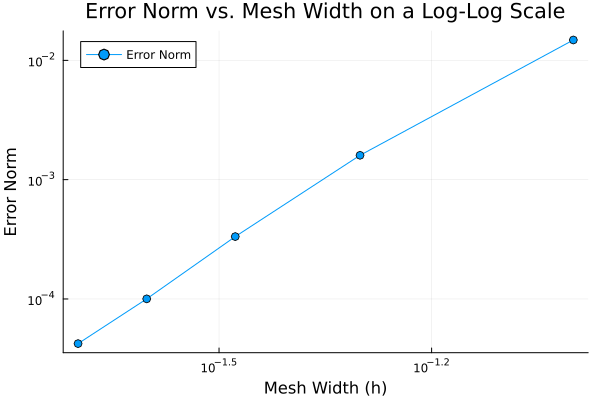

In [194]:

using SymPy
n_e = Vector(10:10:50)
errors = []
mesh_widths = []

function calculate_error(n)
    nelements = n; nnodes = 2*nelements+1; h = 1/nelements; h2=h*h; 
a = Vector(0:h:1); 
xmid = a[1:end-1].+h/2;

alpha1 = 1000;

points = collect([a[i], xmid[i], a[i+1]] for i in 1:nelements);


edges = collect([2*i-1, 2*i, 2*i+1] for i in 1:nelements);
fsource(a) = 0;

A = zeros((2*nelements+1),(2*nelements+1));
Al = zeros((2*nelements+1),(2*nelements+1));
floc = zeros(Float64,3, 1)
f = zeros(Float64,nnodes) 
M = zeros((2*nelements+1),(2*nelements+1));


for i in 1:nelements
    @syms x
    phi1 = (x - points[i][2]) * (x - points[i][3]) / ((points[i][1] - points[i][2]) * (points[i][1] - points[i][3]));
    phi2 = (x - points[i][1]) * (x - points[i][3]) / ((points[i][2] - points[i][1]) * (points[i][2] - points[i][3]));
    phi3 = (x - points[i][1]) * (x - points[i][2]) / ((points[i][3] - points[i][1]) * (points[i][3] - points[i][2]));
    dphi = [diff(phi, x) for phi in [phi1, phi2, phi3]];
    
    xl, xm, xr = points[i]
    Aloc = [integrate(dphi[j] * dphi[k], (x, xl, xr)) for j in 1:3, k in 1:3];
    phi = [phi1 , phi2, phi3]
    
    Mloc = [integrate(phi[j] * phi[k], (x, xl, xr)) for j in 1:3, k in 1:3];
    #for j in 1:3
    #    for k in 1:3
    #        M[j,k] = integrate(dphi[j]*dphi[k], (x, 0, 1))
    #    end
    #end

    #M = -alpha1 .* M

    floc = h/3 * [fsource(points[i][1]), 2*fsource((points[i][1]+points[i][3])/2), fsource(points[i][3])]

    # Assemble local matrices into the global matrix A
    global_nodes = edges[i]
    for j in 1:3
        f[global_nodes[j]] += floc[j]
        for k in 1:3
            Al[global_nodes[j], global_nodes[k]] += Aloc[j,k]
            M[global_nodes[j], global_nodes[k]] += Mloc[j,k]
        end
    end
end


A = Al + alpha1*M;

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1;     A[1,2] = 0; A[1,3] =0;       f[1]   = 0 
A[end,end-1]=0; A[end,end] = 1;  A[end,end-2]=0;  f[end] = 1



#..solve the linear system
u = A \ f
X = Vector(0:h/2:1)
F_s(x) = sinh(sqrt(alpha1)*x)/sinh(sqrt(alpha1));
F_sa = F_s.(X)
    error = F_sa-u;
    error_norm = norm(error,Inf)
    return h, error_norm
end

for n in n_e
    h, error_norm = calculate_error(n)
    push!(mesh_widths, h)
    push!(errors, error_norm)
end


# Plot the error on a log-log scale
p1 = plot(mesh_widths, errors, m=:o, xscale=:log10, yscale=:log10,
     xlabel="Mesh Width (h)", ylabel="Error Norm",
     title="Error Norm vs. Mesh Width on a Log-Log Scale",
     label="Error Norm")

In the first order equations we can see that the error norm is higher as compared to the second order equations because second order equations have polynomial equations so they have better accuracy and increased approximation. 

## Assignment 8

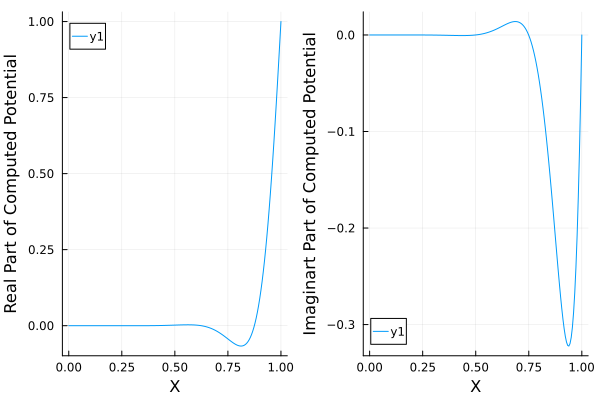

In [46]:
using SymPy
nelements = 90; nnodes = 2*nelements+1; h = 1/nelements; h2=h*h; 
a = Vector(0:h:1); 
xmid = a[1:end-1].+h/2;

alpha1 = 2*im*pi*50;

points = collect([a[i], xmid[i], a[i+1]] for i in 1:nelements);


edges = collect([2*i-1, 2*i, 2*i+1] for i in 1:nelements);
fsource(a) = 0;

A = zeros((2*nelements+1),(2*nelements+1));
Al = zeros((2*nelements+1),(2*nelements+1));
floc = zeros(Float64,3, 1)
f = zeros(Float64,nnodes) 
M = zeros((2*nelements+1),(2*nelements+1));


for i in 1:nelements
    @syms x
    phi1 = (x - points[i][2]) * (x - points[i][3]) / ((points[i][1] - points[i][2]) * (points[i][1] - points[i][3]));
    phi2 = (x - points[i][1]) * (x - points[i][3]) / ((points[i][2] - points[i][1]) * (points[i][2] - points[i][3]));
    phi3 = (x - points[i][1]) * (x - points[i][2]) / ((points[i][3] - points[i][1]) * (points[i][3] - points[i][2]));
    dphi = [diff(phi, x) for phi in [phi1, phi2, phi3]];
    
    xl, xm, xr = points[i]
    Aloc = [integrate(dphi[j] * dphi[k], (x, xl, xr)) for j in 1:3, k in 1:3];
    phi = [phi1 , phi2, phi3]
    
    Mloc = [integrate(phi[j] * phi[k], (x, xl, xr)) for j in 1:3, k in 1:3];
    #for j in 1:3
    #    for k in 1:3
    #        M[j,k] = integrate(dphi[j]*dphi[k], (x, 0, 1))
    #    end
    #end

    #M = -alpha1 .* M

    floc = h/3 * [fsource(points[i][1]), 2*fsource((points[i][1]+points[i][3])/2), fsource(points[i][3])]

    # Assemble local matrices into the global matrix A
    global_nodes = edges[i]
    for j in 1:3
        f[global_nodes[j]] += floc[j]
        for k in 1:3
            Al[global_nodes[j], global_nodes[k]] += Aloc[j,k]
            M[global_nodes[j], global_nodes[k]] += Mloc[j,k]
        end
    end
end


A = Al + alpha1*M;

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1;     A[1,2] = 0; A[1,3] =0;       f[1]   = 0 
A[end,end-1]=0; A[end,end] = 1;  A[end,end-2]=0;  f[end] = 1


F_a(a) = sinh(sqrt(alpha1) * a) / sinh(sqrt(alpha1))
x1=Vector(0:h:1)

F_a1 = F_a.(x1) 


#..solve the linear system
u = A \ f
X = Vector(0:h/2:1)
U_r = real(u)
U_i= imag(u)

p1=plot(X,U_r,xlabel = "X", ylabel="Real Part of Computed Potential")
p2=plot(X,U_i,xlabel = "X", ylabel="Imaginart Part of Computed Potential")
p3=plot(U_r,U_i, xlabel = "Real Part of Computed Potential",ylabel = "Imaginary Part of Computed Potential")

plot(p1,p2,layout=(1,2))
   

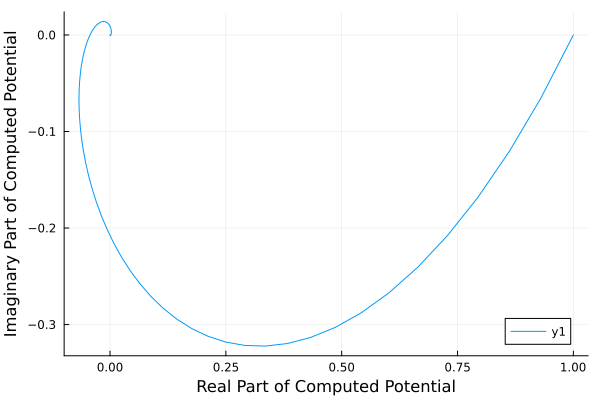

In [47]:
plot(p3)

## Assignment 9

A callable struct is a type that can act like a function. Struct acts like a function when called. This can be particularly useful in FEM simulations where you want to use it quite often for different number of simulations or like different inputs. Callable structs are useful in FEM for defining boundary conditions, source terms, or even the variational form of the PDE itself. It makes the code more resuable and easy to access for different situtations.

Below is the example for struct

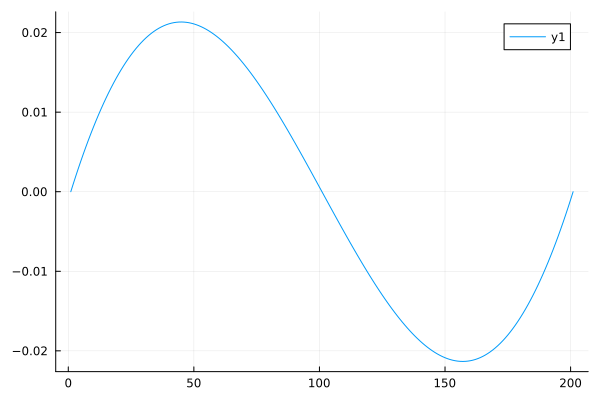

In [202]:
# struct to hold a single mesh element
# all the members of the struct should be concrete type 
struct Element
  p1::Float64    # coordinate left-most node
  p2::Float64    # coordinate right-most node
  e1::Int64      # global index left-most node
  e2::Int64      # global index right-most node
  area::Float64  # area of the element 
end

# struct to hold entire mesh
struct Mesh
  nnodes::Int64
  nelements::Int64 
  # specify one-dimensional array of elements as an array of structs. 
  # we worry about using structArray (if as all) later. 
  Elements::Array{Element,1}
  bndNodeIds::Vector{Int64}
  dofPerElement::Int64       
end 

# function to generate a mesh on the interval 0 <= x <= 1.   
# we limit the type of input to be Int64 
function genMesh(nelements::Int64)::Mesh
    h = 1/nelements 
    nnodes = nelements+1
    dofPerElement = 2 
    x = Vector{Float64}(0:h:1)    
    # what does the undef do here? 
    Elements = Array{Element,1}(undef,nelements)
    for i in 1:nelements
        Elements[i] = Element(x[i],x[i+1],i,i+1,x[i+1]-x[i])
    end
    mesh = Mesh(nnodes,nelements,Elements,[1,nelements+1],dofPerElement)     
    return mesh;
end 

# generates local stiffness matrix 
function genLocStiffMat(element::Element)
    h     = element.area 
    e1    = element.e1
    e2    = element.e2
    Iloc  = SVector(e1, e1, e2, e2) 
    Jloc  = SVector(e1, e2, e1, e2) 
    Aloc  = SVector(1/h, -1/h, -1/h, 1/h) 
    return Iloc, Jloc, Aloc
end

# generate global stiffness matrix 
function genStiffMat(mesh::Mesh)
    
    #..recover number of elements  
    nelements = mesh.nelements
    dofperelem = 4; 
    
    #..preallocate the memory for local matrix contributions 
    Avalues = zeros(Float64,dofperelem*nelements)
    I = zeros(Int64,length(Avalues))
    J = zeros(Int64,length(Avalues))

    for i = 1:nelements #..loop over number of elements..
        element = mesh.Elements[i]
        Iloc, Jloc, Aloc = genLocStiffMat(element) 
        irng = mrange(4*i-3,4*i) 
        I[irng] .= Iloc 
        J[irng] .= Jloc 
        Avalues[irng] .= Aloc         
    end
    
    A = sparse(I,J,Avalues)
   
    return A; 
end

# generate global stiffness matrix 
function genStiffMat2(mesh::Mesh)
    
    #..recover number of elements  
    nelements = mesh.nelements
    dofperelem = 4; 
    
    #..preallocate the memory for local matrix contributions 
    Avalues = zeros(Float64,dofperelem*nelements)
    I = zeros(Int64,length(Avalues))
    J = zeros(Int64,length(Avalues))
    
    for (i,element) in enumerate(mesh.Elements) #..loop over number of elements..
        Iloc, Jloc, Aloc = genLocStiffMat(element) 
        irng = mrange(4*i-3,4*i) 
        I[irng] .= Iloc 
        J[irng] .= Jloc 
        Avalues[irng] .= Aloc 
    end
    A = sparse(I,J,Avalues)
   
    return A; 
end

fsource(x) = cos(pi*x)

function genLocVec(element, sourceFct)
    h = element.area 
    Iloc = SVector(element.e1, element.e2)
    floc = (h/2)*SVector(sourceFct(element.p1), sourceFct(element.p2))
    return Iloc, floc
end

function genVector(mesh, sourceFct::F) where F 
    
    #..recover number of elements  
    nelements = mesh.nelements 
    nnodes = mesh.nnodes 
    
    #..initialize global vector  
    f = zeros(Float64,nnodes)

    for i = 1:nelements #..loop over number of elements..
        element = mesh.Elements[i]
        Iloc, floc = genLocVec(element,sourceFct) 
        f[Iloc] .+= floc          
    end
   
    return f; 
end

N = 200
mesh = genMesh(N)

A = genStiffMat(mesh) # force compilation 
f = genVector(mesh,fsource) # force compilation

function genSolution(A,f)
    #..handle essential boundary conditions 
    A[1,1] = 1.; A[1,2] = 0.; f[1] = 0.;
    A[end,end] = 1.; A[end,end-1] = 0.; f[end] = 0;
    u = A\f 
    return u 
end

u = genSolution(A,f) # force compilation 

plot(u)

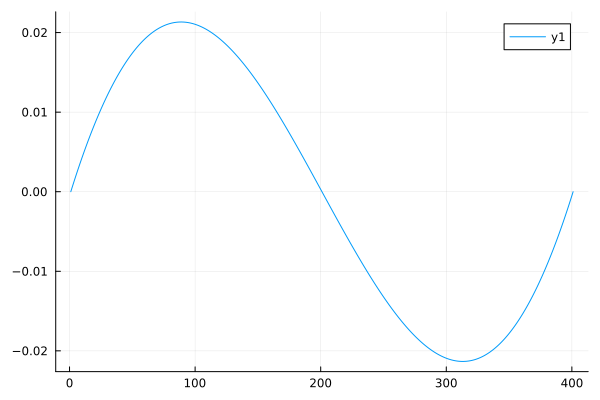

In [201]:
N = 400
mesh = genMesh(N)

A = genStiffMat(mesh) # force compilation 
f = genVector(mesh,fsource) # force compilation

function genSolution(A,f)
    #..handle essential boundary conditions 
    A[1,1] = 1.; A[1,2] = 0.; f[1] = 0.;
    A[end,end] = 1.; A[end,end-1] = 0.; f[end] = 0;
    u = A\f 
    return u 
end

u = genSolution(A,f) # force compilation 

plot(u)

As we can see struct Mesh and struct Element was defined. Each function was able to use the mesh and define their elements easily. Now it can be easily be called by just defining number of elements N. No need to define nodes or size of any matrix. It is already defined by struct which is eventually used by functions. This make the code more readable, flexible and reusable. It also take very less time to compute later once everything is defined. 